Importing some libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

# Loading the MNIST Dataset

In [2]:
mnist = keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Data Pre-processing

In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = keras.utils.to_categorical(train_labels, 10)
test_labels = keras.utils.to_categorical(test_labels, 10)

# Neural Network Model

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])

Compile the model

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Train the model

In [6]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 9s 4ms/step - loss: 0.2929 - accuracy: 0.9149
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1431 - accuracy: 0.9577
Epoch 3/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1064 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0875 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0740 - accuracy: 0.9771


Evaluation of the model

In [7]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'Test accuracy: {test_acc}')

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9758
Test accuracy: 0.9757999777793884


Predictions

In [8]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 2ms/step


Displaying the Result

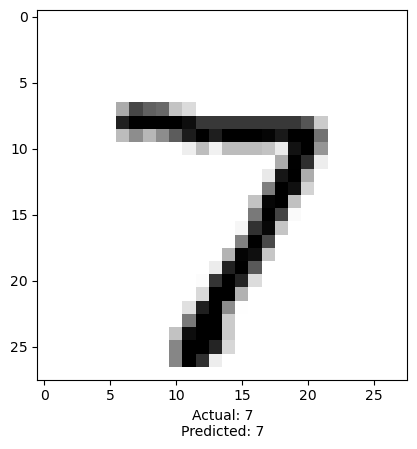

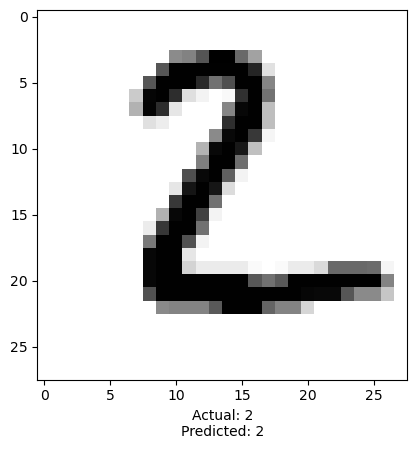

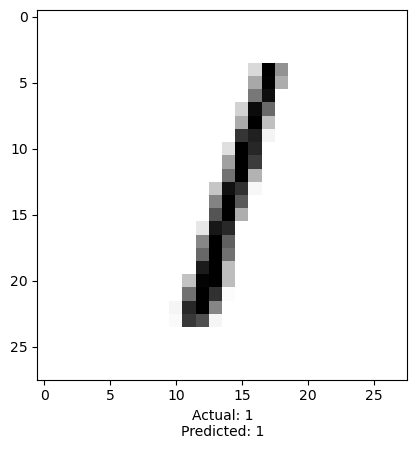

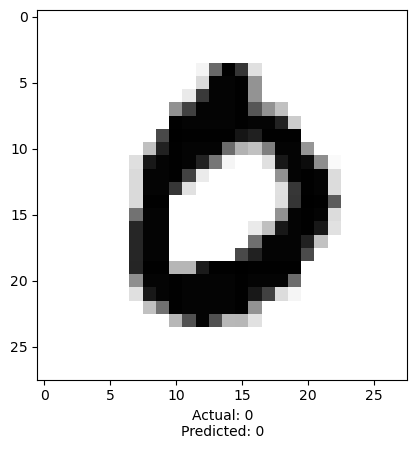

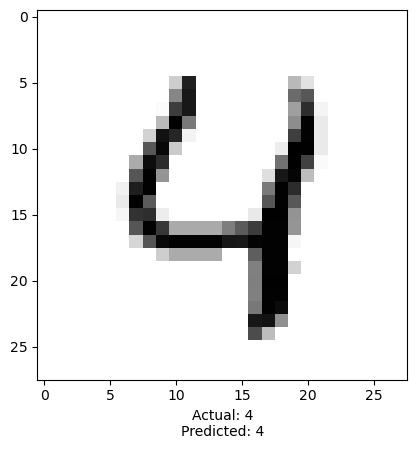

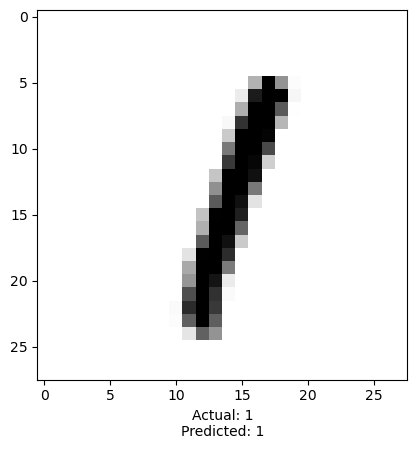

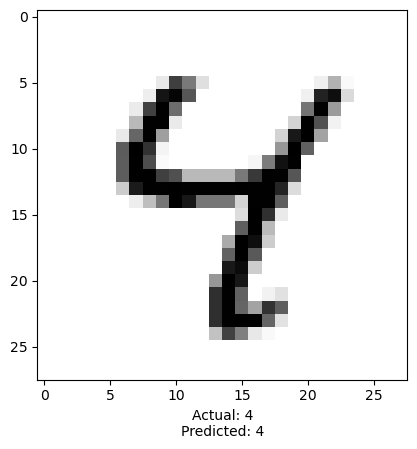

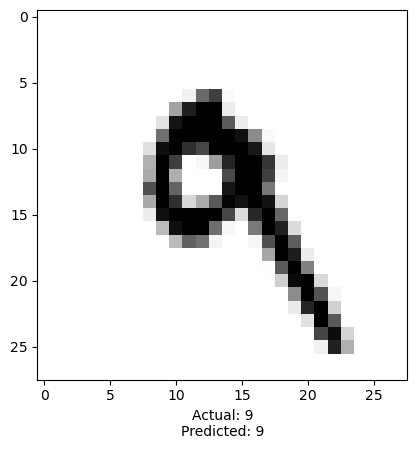

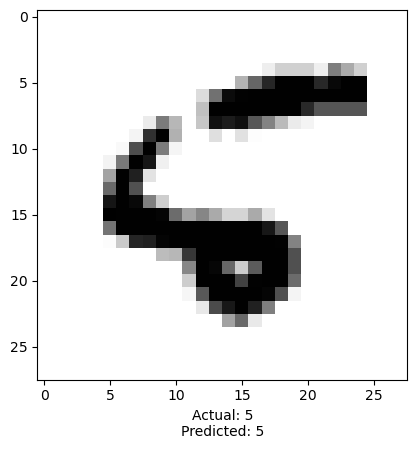

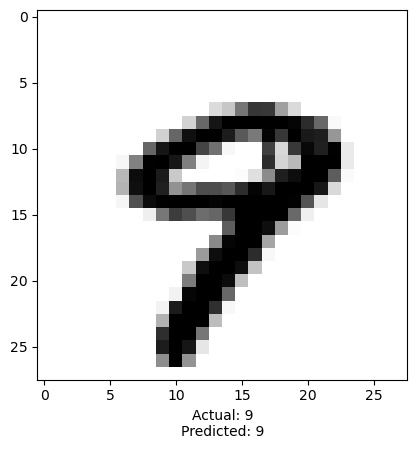

In [9]:
for i in range(10):
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(f"Actual: {test_labels[i].argmax()}\nPredicted: {predictions[i].argmax()}")
    plt.show()